# Polymake Tutorial
### The following is julia (1.5.2) code which uses the package Polymake.jl

Polymake is state-of-the-art software for all of your discrete geometry needs. Its functionality is partitioned into "applications". Here are some:

 * polytope (polyhedra)
 * fan (fans)
 * fulton (toric varieties)
 * graph (graphs)
 * group (groups & their actions on polymake objects)
 * matroid (matroids)
 * topaz (topology)
 * tropical (tropical geometry)
 
Oscar is written in julia and Polymake is written in mostly in C++ and perl. Hence, Polymake.jl is a julia package which allows a user to run Polymake in julia. It can basically do everything Polymake can.

#### Documentation 

Some Polymake Tutorials (https://polymake.org/doku.php/user_guide/start)

See Polymake Documentation (https://polymake.org/doku.php/documentation/latest/start)

See Syntax Translation (https://oscar-system.github.io/Polymake.jl/stable/examples/)


#### Note

Syntax for Polymake through Oscar = Syntax for Polymake.jl 

(i.e. no polymake objects/functions are in Oscar itself yet)

#### Visualization note

Even though everything below only loads Polymake.jl, the syntax for these commands after running "using Oscar" is the same.

Note: visualization works better when Oscar is used through a terminal (not a jupyter notebook like this).

Here I use Polymake.jl from https://github.com/oscar-system/Polymake.jl/pull/336
which has a fix for the visualization.

The project/manifest files can be found at https://github.com/tbrysiewicz/OscarAtMPI

In [1]:
import Pkg

In [3]:
Pkg.activate(".")
Pkg.instantiate()
using Polymake

 Activating environment at `~/Documents/Education/Presentations/Demos/Oscar/OscarDayMPI/Project.toml`


polymake version 4.3
Copyright (c) 1997-2020
Ewgenij Gawrilow, Michael Joswig, and the polymake team
Technische Universität Berlin, Germany
https://polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



## Some basic aspects of polyhedra

* Polyhedra are one of the main types of objects in Polymake. Here are some basic things you can do with them.



In [4]:
P=Polymake.polytope.cube(3) #create a 3-dimensional cube represented as [-1,1]^3

type: Polytope<Rational>
description: cube of dimension 3

AFFINE_HULL
	

BOUNDED
	true

CONE_AMBIENT_DIM
	4

CONE_DIM
	4

FACETS
  1   1   0   0
  1  -1   0   0
  1   0   1   0
  1   0  -1   0
  1   0   0   1
  1   0   0  -1

VERTICES_IN_FACETS
	{0 2 4 6}
	{1 3 5 7}
	{0 1 4 5}
	{2 3 6 7}
	{0 1 2 3}
	{4 5 6 7}

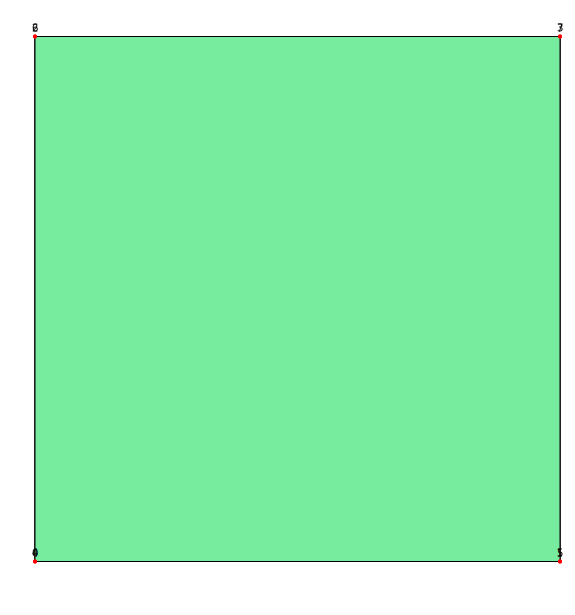

polymake: used package SVG
   Generated using the Perl SVG Module
   by Ronan Oger

polymake: used package threejs
   Three.js is a lightweight cross-browser JavaScript library/API used to create and display animated 3D computer graphics on a Web browser.
   See http://github.com/mrdoob for the source code.



In [5]:
Polymake.polytope.visual(P) #visualize the cube

#### Polytopes are the convex hull of finitely many points (V-representation). The minimal set of points = "vertices"

Note! Polymake uses homogeneous coordinates. 

Think: polytope is embedded one dimension higher at height (first coordinate)=1 

or 

Think: Polytopes are cones in one dimension higher sliced at (first coordinate)=1


In [6]:
P.VERTICES

pm::Matrix<pm::Rational>
1 -1 -1 -1
1 1 -1 -1
1 -1 1 -1
1 1 1 -1
1 -1 -1 1
1 1 -1 1
1 -1 1 1
1 1 1 1


#### Polytopes are also the intersection of finitely many half-spaces (H-representation). Minimal set of halfspaces = "facets"

In [7]:
P.FACETS

pm::SparseMatrix<pm::Rational, pm::NonSymmetric>
1 1 0 0
1 -1 0 0
1 0 1 0
1 0 -1 0
1 0 0 1
1 0 0 -1


Read first row as 

$1+1\cdot x+0 \cdot y + 0 \cdot z \geq 0$

In [8]:
# Just typing an object usually prints some info about it
P

type: Polytope<Rational>
description: cube of dimension 3

AFFINE_HULL
	

BOUNDED
	true

COMBINATORIAL_DIM
	3

CONE_AMBIENT_DIM
	4

CONE_DIM
	4

DUAL_GRAPH
	type: Graph<Undirected> as Polytope<Rational>::DUAL_GRAPH

FACETS
  1   1   0   0
  1  -1   0   0
  1   0   1   0
  1   0  -1   0
  1   0   0   1
  1   0   0  -1

FEASIBLE
	true

GRAPH
	type: Graph<Undirected> as Polytope<Rational>::GRAPH

LINEALITY_DIM
	0

LINEALITY_SPACE
	

NEIGHBOR_FACETS_CYCLIC_NORMAL
	2 5 3 4
	5 2 4 3
	5 0 4 1
	0 5 1 4
	0 3 1 2
	0 2 1 3

N_EDGES
	12

POINTED
	true

VERTICES
  1  -1  -1  -1
  1   1  -1  -1
  1  -1   1  -1
  1   1   1  -1
  1  -1  -1   1
  1   1  -1   1
  1  -1   1   1
  1   1   1   1

VERTICES_IN_FACETS
	{0 2 4 6}
	{1 3 5 7}
	{0 1 4 5}
	{2 3 6 7}
	{0 1 2 3}
	{4 5 6 7}

VIF_CYCLIC_NORMAL
	0 4 6 2
	7 5 1 3
	5 4 0 1
	2 6 7 3
	0 2 3 1
	6 4 5 7

#### Note that we have more properties (fieldnames) on this list than before. Let's check some of them out!

In [9]:
println("Bounded:")
println(P.BOUNDED)

println("\nCone ambient dimension:")
println(P.CONE_AMBIENT_DIM)

println("\nCone dimension:")
println(P.CONE_DIM)

println("\nFacets:")
println(P.FACETS)

println("\nConverting facets to a julia array:")
println(convert(Array{Int64,2},(P.FACETS)))

#Polymake indexes starting at zero.

println("\nVertices in facet incidence:")
println(P.VERTICES_IN_FACETS)

println("Combinatorial dimension:")
println(P.COMBINATORIAL_DIM)

Bounded:
true

Cone ambient dimension:
4

Cone dimension:
4

Facets:
pm::SparseMatrix<pm::Rational, pm::NonSymmetric>
1 1 0 0
1 -1 0 0
1 0 1 0
1 0 -1 0
1 0 0 1
1 0 0 -1


Converting facets to a julia array:
[1 1 0 0; 1 -1 0 0; 1 0 1 0; 1 0 -1 0; 1 0 0 1; 1 0 0 -1]

Vertices in facet incidence:
pm::IncidenceMatrix<pm::NonSymmetric>
{0 2 4 6}
{1 3 5 7}
{0 1 4 5}
{2 3 6 7}
{0 1 2 3}
{4 5 6 7}

Combinatorial dimension:
3


In [10]:
# Some fun visualization
P.TRIANGULATION

type: GeometricSimplicialComplex<Rational> as Polytope<Rational>::TRIANGULATION

FACETS
  pm::Set<long, pm::operations::cmp>
{0 1 2 4}
  pm::Set<long, pm::operations::cmp>
{1 2 3 4}
  pm::Set<long, pm::operations::cmp>
{1 3 4 5}
  pm::Set<long, pm::operations::cmp>
{2 3 4 6}
  pm::Set<long, pm::operations::cmp>
{3 4 5 6}
  pm::Set<long, pm::operations::cmp>
{3 5 6 7}

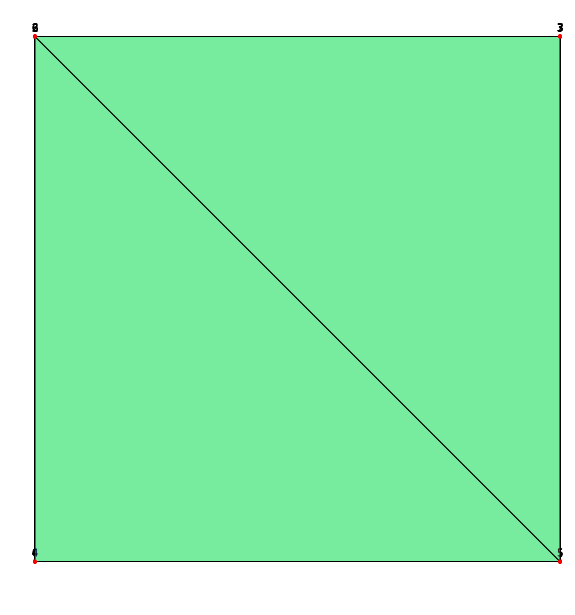

In [11]:
Polymake.polytope.visual(P.TRIANGULATION)

In [12]:
P.TRIANGULATION.FACETS

pm::Array<pm::Set<long, pm::operations::cmp>>
{0 1 2 4}
{1 2 3 4}
{1 3 4 5}
{2 3 4 6}
{3 4 5 6}
{3 5 6 7}


polymake: used package ppl
  The Parma Polyhedra Library ([[wiki:external_software#PPL]]): A C++ library for convex polyhedra
  and other numerical abstractions.
  http://www.cs.unipr.it/ppl/

polymake: used package cdd
  cddlib
  Implementation of the double description method of Motzkin et al.
  Copyright by Komei Fukuda.
  http://www-oldurls.inf.ethz.ch/personal/fukudak/cdd_home/



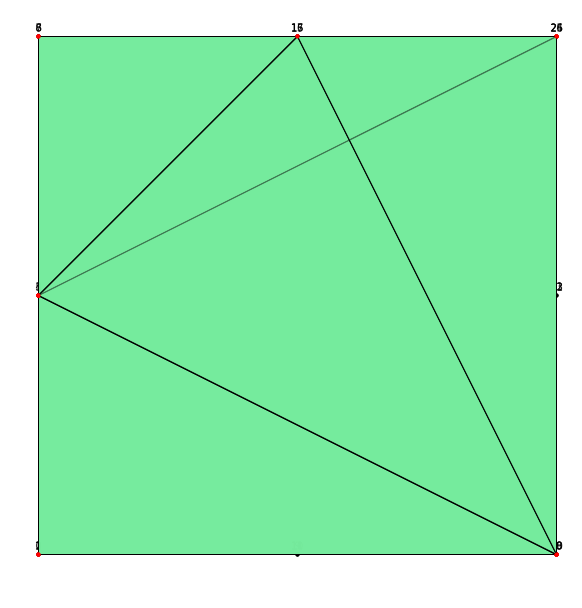

In [13]:
# You can subdivide the polytope yourself using a lifting function
A = Polymake.polytope.lattice_points(P)
λ = [1,0,2,1,0,3,3,2,2,1,3,2,4,2,3,1,5,2,0,2,0,3,3,4,2,1,0];
F = Polymake.polytope.regular_subdivision(A, λ)
TT = Polymake.fan.SubdivisionOfPoints(POINTS = A, MAXIMAL_CELLS = F);
Polymake.polytope.visual(TT)


## Making your own polytopes!

In [14]:
Q=Polymake.polytope.Polytope(POINTS=[[1,0,0,0] [1,4,0,0] [1,0,4,0] [1,0,0,4] [1,1,1,1] [1,1,1,5]]')

type: Polytope<Rational>

POINTS
  1  0  0  0
  1  4  0  0
  1  0  4  0
  1  0  0  4
  1  1  1  1
  1  1  1  5

Note: if you don't know already the points are vertices, use POINTS, not VERTICES. (Same later with INEQUALITIES versus FACETS)

In [15]:
Q.VERTICES

pm::Matrix<pm::Rational>
1 0 0 0
1 4 0 0
1 0 4 0
1 0 0 4
1 1 1 5


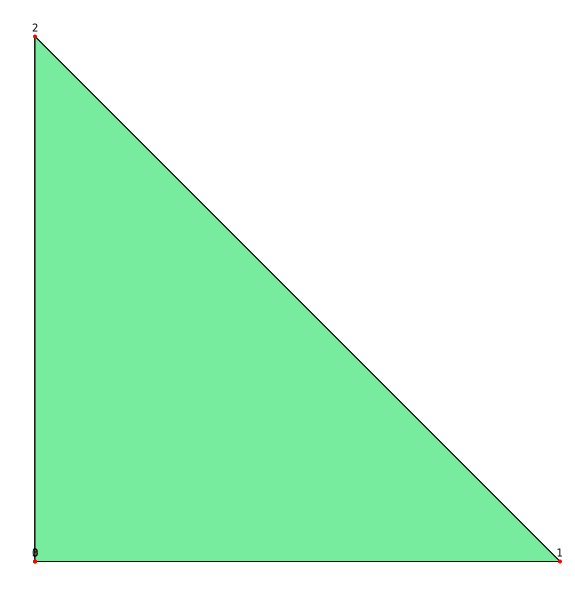

In [16]:
Polymake.polytope.visual(Q)

### Defining polyhedra via halfspaces

In [17]:
MyHPolytope=Polymake.polytope.Polytope(INEQUALITIES = 
    [[1,1,1,1] [1, 2, 2,-2] [1,-1,-1,1] [1,2,2,-1]])

type: Polytope<Rational>

INEQUALITIES
  1   1   1   1
  1   2  -1   2
  1   2  -1   2
  1  -2   1  -1
  1   0   0   0

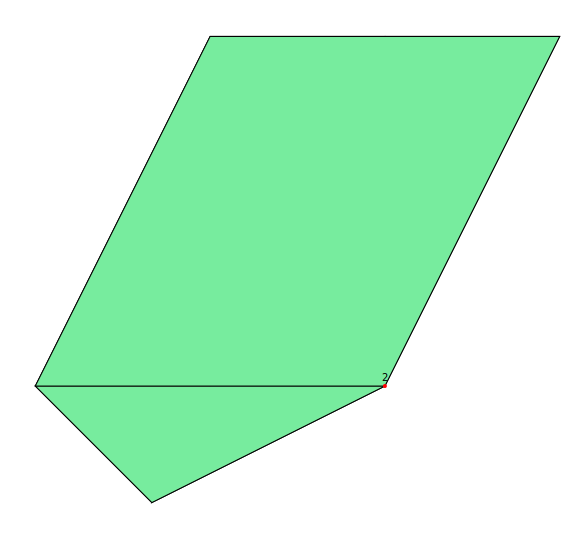

In [18]:
#Notice the different color here. Red = unbounded region
Polymake.polytope.visual(MyHPolytope)

In [19]:
MyHPolytope.BOUNDED

false

In [20]:
MyPolytope=Polymake.polytope.intersection(MyHPolytope,Polymake.polytope.cross(3))
MyPolytope.VERTICES

pm::Matrix<pm::Rational>
1 0 1 0
1 0 -1 0
1 2/3 1/3 0
1 2/3 0 -1/3
1 0 0 1
1 -3/4 0 1/4
1 1/4 0 -3/4
1 -2/3 -1/3 0
1 0 -1/3 -2/3


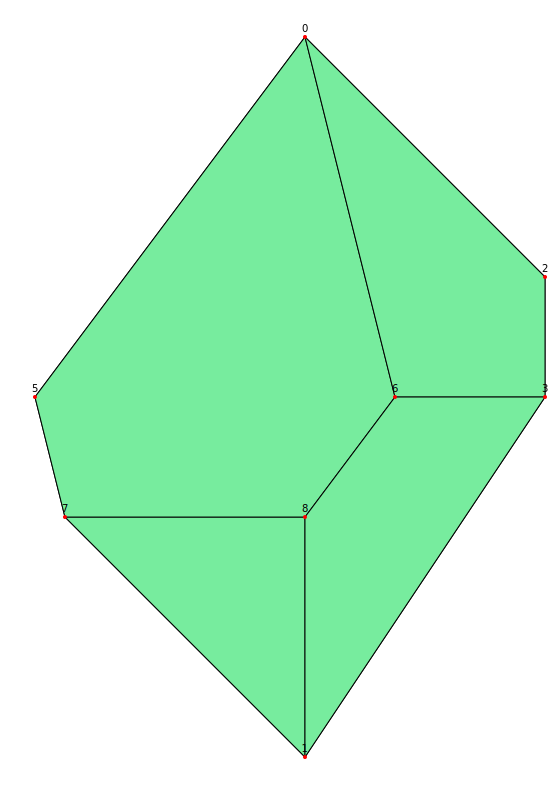

In [21]:
Polymake.polytope.visual(MyPolytope)

In [22]:
MyPolytope.F_VECTOR

pm::Vector<pm::Integer>
9 15 8

In [23]:
MyPolytope.VOLUME

17/18

In [24]:
F=Polymake.fan.normal_fan(MyPolytope)

type: PolyhedralFan<Rational>

COMPLETE
	true

FAN_AMBIENT_DIM
	3

FAN_DIM
	3

LINEALITY_SPACE
	

MAXIMAL_CONES
	{1 3 4 6}
	{0 2 5 7}
	{2 3 6}
	{2 6 7}
	{2 3 4 5}
	{1 4 5}
	{1 6 7}
	{0 1 5}
	{0 1 7}

PSEUDO_REGULAR
	true

RAYS
	1 1 1
	1 -1/2 1
	-1 1/2 -1/2
	-1 -1 -1
	1 -1 -1
	1 1 -1
	-1 -1 1
	-1 1 1

REGULAR
	true

In [25]:
F.RAYS

pm::Matrix<pm::Rational>
1 1 1
1 -1/2 1
-1 1/2 -1/2
-1 -1 -1
1 -1 -1
1 1 -1
-1 -1 1
-1 1 1


In [26]:
F.MAXIMAL_CONES

pm::IncidenceMatrix<pm::NonSymmetric>
{1 3 4 6}
{0 2 5 7}
{2 3 6}
{2 6 7}
{2 3 4 5}
{1 4 5}
{1 6 7}
{0 1 5}
{0 1 7}


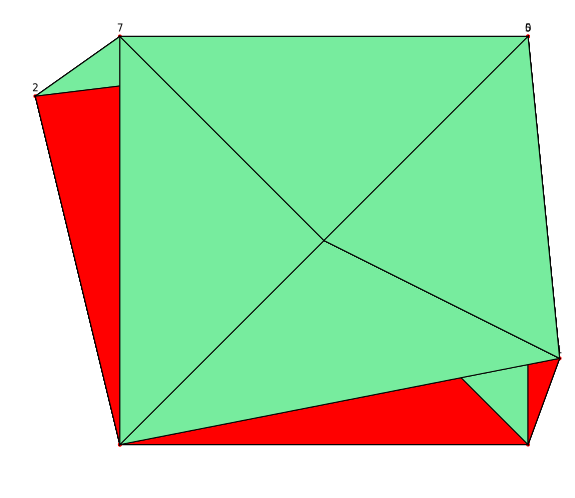

In [27]:
Polymake.fan.visual(F)

In [28]:
MS=Polymake.polytope.minkowski_sum(MyPolytope,Polymake.polytope.cross(3))

type: Polytope<Rational>
description: Minkowski sum of 1* and 1*

CONE_AMBIENT_DIM
	4

INPUT_LINEALITY
	

POINTS
  1     1     1     0
  1    -1     1     0
  1     0     2     0
  1     0     0     0
  1     0     1     1
  1     0     1    -1
  1     1    -1     0
  1    -1    -1     0
  1     0     0     0
  1     0    -2     0
  1     0    -1     1
  1     0    -1    -1
  1   5/3   1/3     0
  ⋮              
  1   1/3  -1/3     0
  1  -5/3  -1/3     0
  1  -2/3   2/3     0
  1  -2/3  -4/3     0
  1  -2/3  -1/3     1
  1  -2/3  -1/3    -1
  1     1  -1/3  -2/3
  1    -1  -1/3  -2/3
  1     0   2/3  -2/3
  1     0  -4/3  -2/3
  1     0  -1/3   1/3
  1     0  -1/3  -5/3

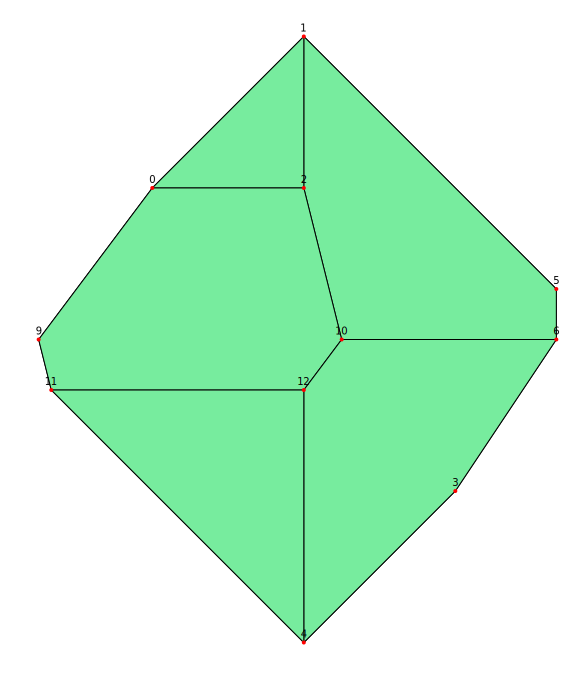

In [29]:
Polymake.polytope.visual(MS)

In [30]:
MS.VOLUME

179/18